In [1]:
# set working dir
import os
os.chdir("../")

In [2]:
from copy import deepcopy
from types import SimpleNamespace

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.reload_library()
plt.style.use("science")
from matplotlib import ticker
import tol_colors as tc

from run import utils

Auto-Sklearn cannot be imported.


In [3]:
def getDf(config, mthd):
    df = pd.read_csv(getPath(config, mthd))
    return df

## Shortest Path 

In [4]:
# init config
config = SimpleNamespace()
config.prob = "sp"
config.grid = (5, 5)
config.feat = 5
config.deg = 4
config.noise = 0.5
config.net = []
config.optm = "adam"
config.l1 = 0.0
config.l2 = 0.0
config.rel = False
config.lan = "gurobi"
config.proc = 8
config.path = "./res"

In [5]:
def getPath(config, mthd):
    config = deepcopy(config)
    if mthd == "lr":
        config.mthd = "2s"
        config.pred = "lr"
    if mthd == "rf":
        config.mthd = "2s"
        config.pred = "rf"
    if mthd == "auto":
        config.mthd = "2s"
        config.pred = "auto"
        config.metric = "mse"
    if mthd == "spo":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-3
    if mthd == "spo l1":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-3
        config.l1 = 1e-3
    if mthd == "spo l2":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-3
        config.l2 = 1e-3
    if mthd == "bb":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 128
        config.lr = 1e-2
        config.smth = 20
    if mthd == "bb l1":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 128
        config.lr = 1e-2
        config.smth = 20
        config.l1 = 1e-3
    if mthd == "bb l2":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 128
        config.lr = 1e-2
        config.smth = 20
        config.l2 = 1e-3
    path = utils.getSavePath(config)
    return path

In [6]:
def drawPlot(config, data):
    # set config
    config = deepcopy(config)
    config.data = data
    # color map
    cset =  tc.tol_cset('light')
    colors = {"2-stage LR":cset.mint,
              "2-stage RF":cset.pink,
              "2-stage Auto":cset.light_yellow,
              "SPO+":cset.orange,
              "SPO+ L1":cset.orange,
              "SPO+ L2":cset.orange,
              "DBB":cset.light_blue,
              "DBB L1":cset.light_blue,
              "DBB L2":cset.light_blue}
    # makerstyle map
    # get df
    dfs = {}
    dfs["2-stage Auto"]  = getDf(config, "auto")
    dfs["2-stage RF"]    = getDf(config, "rf")
    dfs["2-stage LR"]    = getDf(config, "lr")
    dfs["SPO+"]          = getDf(config, "spo")
    dfs["SPO+ L1"]       = getDf(config, "spo l1")
    dfs["SPO+ L2"]       = getDf(config, "spo l2")
    #dfs["DBB"]           = getDf(config, "bb")
    #dfs["DBB L1"]        = getDf(config, "bb l1")
    #dfs["DBB L2"]        = getDf(config, "bb l2")
    # draw boxplot
    fig, ax = plt.subplots(figsize=(12,12))
    for mthd in dfs:
        df, c = dfs[mthd], colors[mthd]
        size = int((np.log(df["Elapsed"].mean())+4)*1000)
        if mthd.split(" ")[-1] == "L1":
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o",
                       alpha=0.8, hatch="+++++", facecolor="w", label=mthd)
        elif mthd.split(" ")[-1] == "L2":
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o",
                       alpha=0.8, hatch="OO", facecolor="w", label=mthd)
        else:
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o", alpha=0.8, label=mthd)
        # adjust annotation
        if mthd == "2-stage LR":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()-0.005), fontsize=18)
        elif mthd == "2-stage RF":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()+0.005), fontsize=18)
        elif mthd == "2-stage Auto":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()-0.01), fontsize=18)
        elif mthd == "SPO+":
            ax.annotate(mthd, (df["MSE"].mean()+0.012, df["Unamb SPO"].mean()-0.012), fontsize=18)
        elif mthd == "SPO+ L1":
            ax.annotate(mthd, (df["MSE"].mean()+0.006, df["Unamb SPO"].mean()-0.006), fontsize=18)
        elif mthd == "SPO+ L2":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()), fontsize=18)
        elif mthd == "DBB":
            ax.annotate(mthd, (df["MSE"].mean()+0.015, df["Unamb SPO"].mean()+0.003), fontsize=18)
        elif mthd == "DBB L1":
            ax.annotate(mthd, (df["MSE"].mean()-0.01, df["Unamb SPO"].mean()-0.01), fontsize=18)
        elif mthd == "DBB L2":
            ax.annotate(mthd, (df["MSE"].mean()+0.01, df["Unamb SPO"].mean()+0.01), fontsize=18)
        else:
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()), fontsize=18)
    # labels and ticks
    plt.xlabel("Mean Squared Error", fontsize=36)
    plt.xticks(fontsize=24)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.yticks(fontsize=24)
    plt.xlim(0.0, 2.0)
    plt.ylim(0.0, 0.2)
    plt.title("Shortest Path\nTraining Set Size = {}, Noise Half−width = {}".format(config.data, config.noise), fontsize=30)
    plt.show()
    #fig.savefig("./images/td-sp-n{}e{}.pdf".format(data,int(10*noise)), dpi=300)

### n = 100

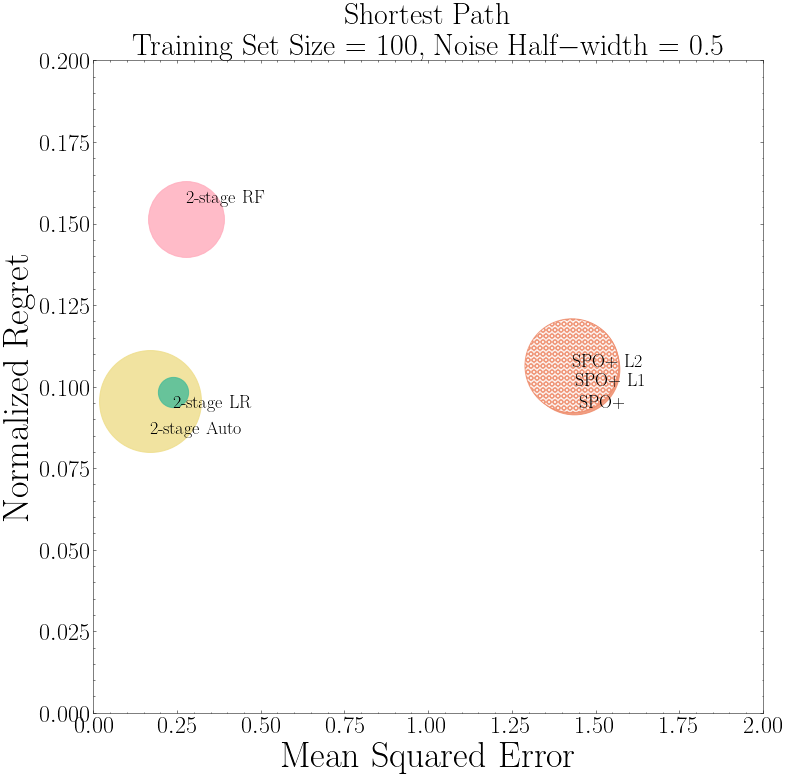

In [7]:
drawPlot(config, data=100)

### n = 1000

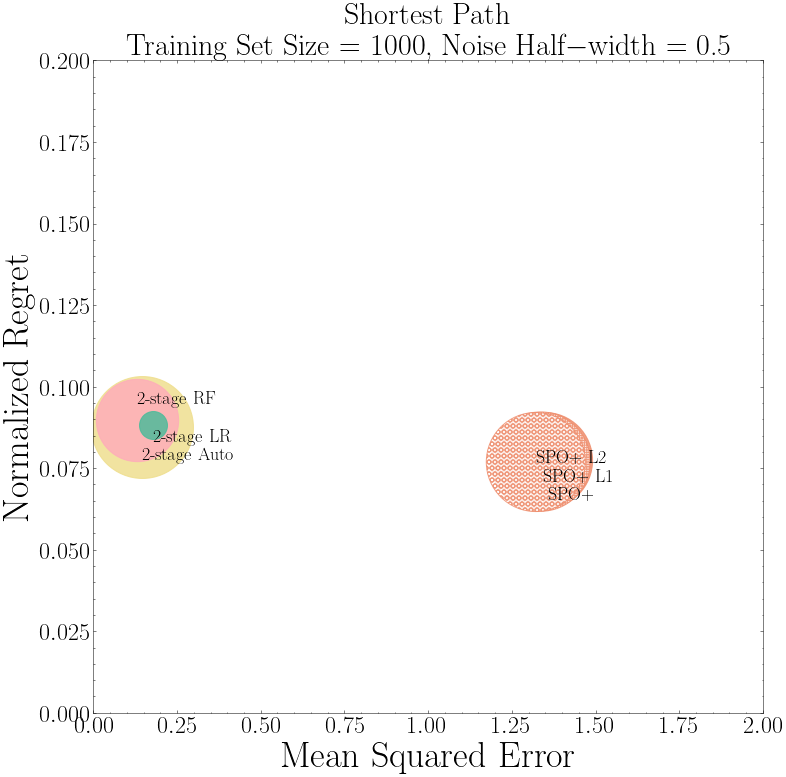

In [8]:
drawPlot(config, data=1000)

## Knapsack 

In [9]:
# init config
config = SimpleNamespace()
config.prob = "ks"
config.item = 32
config.dim = 2
config.cap = 20
config.feat = 5
config.deg = 4
config.noise = 0.5
config.net = []
config.optm = "adam"
config.batch = 32
config.l1 = 0.0
config.l2 = 0.0
config.rel = False
config.lan = "gurobi"
config.proc = 32
config.path = "./res"

In [10]:
def getPath(config, mthd):
    config = deepcopy(config)
    if mthd == "lr":
        config.mthd = "2s"
        config.pred = "lr"
    if mthd == "rf":
        config.mthd = "2s"
        config.pred = "rf"
    if mthd == "auto":
        config.mthd = "2s"
        config.pred = "auto"
        config.metric = "mse"
    if mthd == "spo":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-2
    if mthd == "spo l1":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-2
        config.l1 = 1e-3
    if mthd == "spo l2":
        config.mthd = "spo"
        config.batch = 32
        config.lr = 1e-2
        config.l2 = 1e-3
    if mthd == "bb":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 32
        config.lr = 5e-2
        config.smth = 10
    if mthd == "bb l1":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 32
        config.lr = 5e-2
        config.smth = 10
        config.l1 = 1e-3
    if mthd == "bb l2":
        config.mthd = "bb"
        config.loss = "r"
        config.batch = 32
        config.lr = 5e-2
        config.smth = 10
        config.l2 = 1e-3
    path = utils.getSavePath(config)
    return path

In [11]:
def drawPlot(config, data):
    # set config
    config = deepcopy(config)
    config.data = data
    # color map
    cset =  tc.tol_cset('light')
    colors = {"2-stage LR":cset.mint,
              "2-stage RF":cset.pink,
              "2-stage Auto":cset.light_yellow,
              "SPO+":cset.orange,
              "SPO+ L1":cset.orange,
              "SPO+ L2":cset.orange,
              "DBB":cset.light_blue,
              "DBB L1":cset.light_blue,
              "DBB L2":cset.light_blue}
    # makerstyle map
    # get df
    dfs = {}
    dfs["SPO+"]          = getDf(config, "spo")
    dfs["SPO+ L1"]       = getDf(config, "spo l1")
    dfs["SPO+ L2"]       = getDf(config, "spo l2")
    #dfs["DBB"]           = getDf(config, "bb")
    #dfs["DBB L1"]        = getDf(config, "bb l1")
    #dfs["DBB L2"]        = getDf(config, "bb l2")
    dfs["2-stage Auto"]  = getDf(config, "auto")
    dfs["2-stage RF"]    = getDf(config, "rf")
    dfs["2-stage LR"]    = getDf(config, "lr")
    # draw boxplot
    fig, ax = plt.subplots(figsize=(12,12))
    for mthd in dfs:
        df, c = dfs[mthd], colors[mthd]
        size = int((np.log(df["Elapsed"].mean())+4)*1000)
        if mthd.split(" ")[-1] == "L1":
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o",
                       alpha=0.8, hatch="+++++", facecolor="w")
        elif mthd.split(" ")[-1] == "L2":
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o",
                       alpha=0.8, hatch="OO", facecolor="w")
        else:
            ax.scatter(df["MSE"].mean(), df["Unamb SPO"].mean(), s=size, color=c, marker="o", alpha=0.8)
        # adjust annotation
        if mthd == "2-stage Auto":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()-0.01), fontsize=18)
        elif mthd == "SPO+":
            ax.annotate(mthd, (df["MSE"].mean()+0.012, df["Unamb SPO"].mean()-0.012), fontsize=18)
        elif mthd == "SPO+ L1":
            ax.annotate(mthd, (df["MSE"].mean()+0.006, df["Unamb SPO"].mean()-0.006), fontsize=18)
        elif mthd == "SPO+ L2":
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()), fontsize=18)
        else:
            ax.annotate(mthd, (df["MSE"].mean(), df["Unamb SPO"].mean()), fontsize=18)
    # labels and ticks
    plt.xlabel("Mean Squared Error", fontsize=36)
    plt.xticks(fontsize=24)
    plt.ylabel("Normalized Regret", fontsize=36)
    plt.yticks(fontsize=24)
    plt.xlim(0.0, 20)
    plt.ylim(0.0, 0.2)
    plt.title("2D Knapsack\nTraining Set Size = {}, Noise Half−width = {}".format(config.data, config.noise), fontsize=30)
    plt.show()
    #fig.savefig("./images/td-ks2-n{}e{}.pdf".format(data,int(10*noise)), dpi=300)

### n = 100 

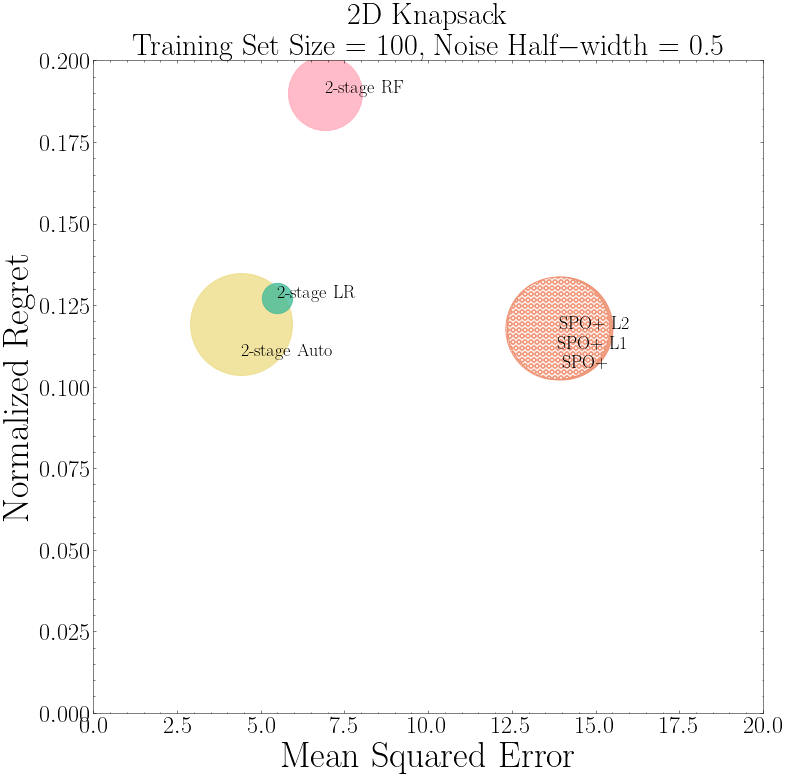

In [12]:
drawPlot(config, data=100)

### n = 1000 

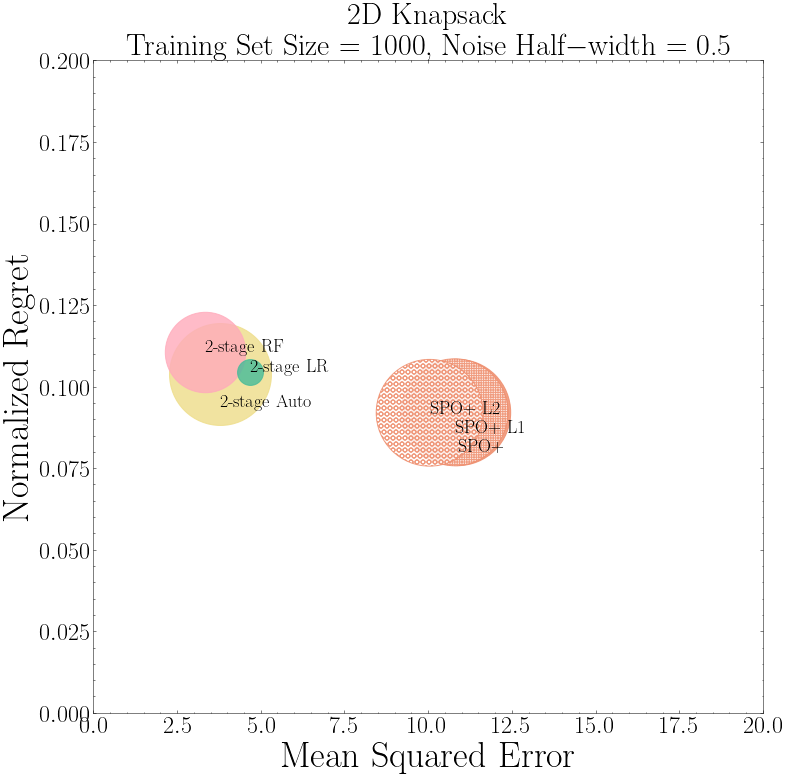

In [13]:
drawPlot(config, data=1000)